# Exploratory Data Analysis (EDA) on a Sales Dataset

### Importing All Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Load the Data

In [3]:
df = pd.read_csv('100 Sales Records.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


### Checking for NAN

In [4]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Converting Order Date column to datetime

In [5]:
datetime = df['Order Date'] = pd.to_datetime(df['Order Date'])
print(datetime)

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]


### Extracting Month and Year from Order Date

In [6]:
month = df['Month'] = df['Order Date'].dt.month
year = df['Year'] = df['Order Date'].dt.year
print(month)

print()

print(year)

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: Order Date, Length: 100, dtype: int32

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Order Date, Length: 100, dtype: int32


### Total sales per rigion

In [7]:
region_sales = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)
print(region_sales)

Region
Sub-Saharan Africa                   182870
Europe                                98117
Australia and Oceania                 68325
Asia                                  59967
Middle East and North Africa          48678
Central America and the Caribbean     35771
North America                         19143
Name: Units Sold, dtype: int64


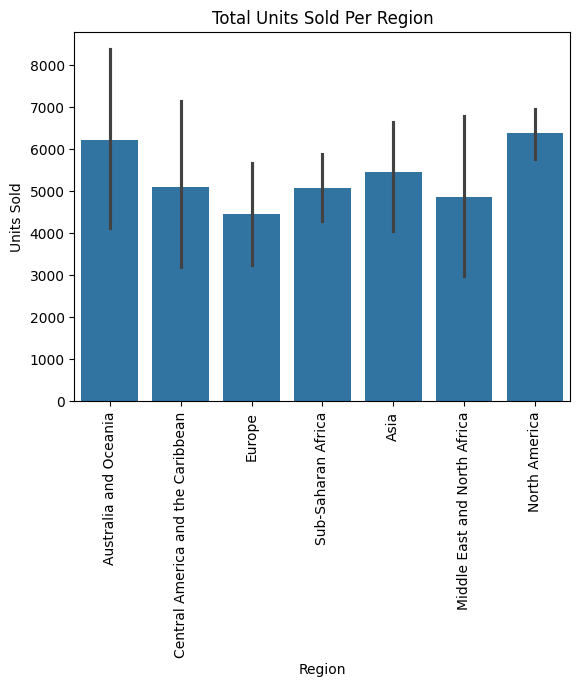

In [8]:
sns.barplot(data=df, x='Region', y='Units Sold')
plt.title("Total Units Sold Per Region")
plt.xticks(rotation=90)
plt.show()

### Top 10 Products sold

In [9]:
top_products = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).head(10)
print(top_products)

Item Type
Cosmetics          83718
Clothes            71260
Beverages          56708
Fruits             49998
Personal Care      48708
Office Supplies    46967
Household          44727
Baby Food          40545
Cereal             25877
Vegetables         20051
Name: Units Sold, dtype: int64


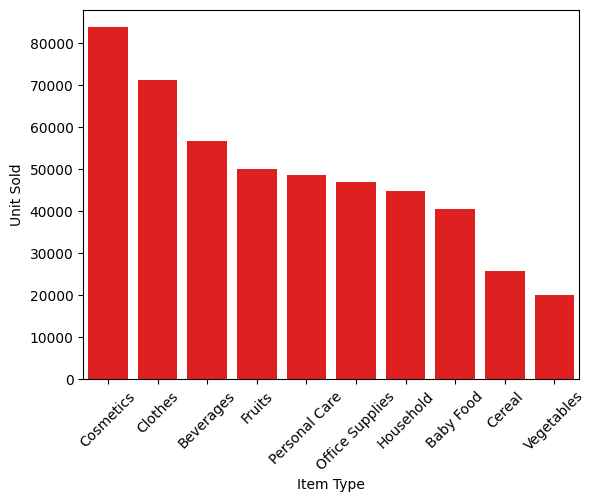

In [10]:
sns.barplot( x =top_products.index, y = top_products.values, color='red')
plt.xlabel('Item Type')
plt.ylabel('Unit Sold')
plt.xticks(rotation = 45)
plt.show()

### Monthly Sales Trend

In [11]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Units Sold'].sum()
print(monthly_sales)

Order Date
2010-02     9503
2010-05    15747
2010-06     9905
2010-10    14403
2010-11     7910
2010-12     4103
2011-01    12914
2011-02     8156
2011-04     4187
2011-05     5741
2011-06      124
2011-07      888
2011-09     3732
2011-11    19026
2012-01     1548
2012-02    15776
2012-03     6457
2012-04     8903
2012-05    10984
2012-06     7620
2012-07    22646
2012-08     2804
2012-09    16545
2012-10     4684
2013-02     5062
2013-03     4063
2013-04     5010
2013-06     5432
2013-07    19546
2013-08     9606
2013-09     7637
2013-10     6182
2013-12     2125
2014-02    10460
2014-04    13808
2014-05     9229
2014-06     8102
2014-07    14513
2014-08     4168
2014-09     2187
2014-10    22619
2014-11     6954
2015-01     8250
2015-02     5821
2015-04    12772
2015-07    13110
2015-08      673
2015-10     2924
2015-11     5930
2016-03      962
2016-05     5070
2016-06     3710
2016-07     5498
2016-10     4660
2016-11    13441
2016-12     9815
2017-01    13030
2017-02    16301
201

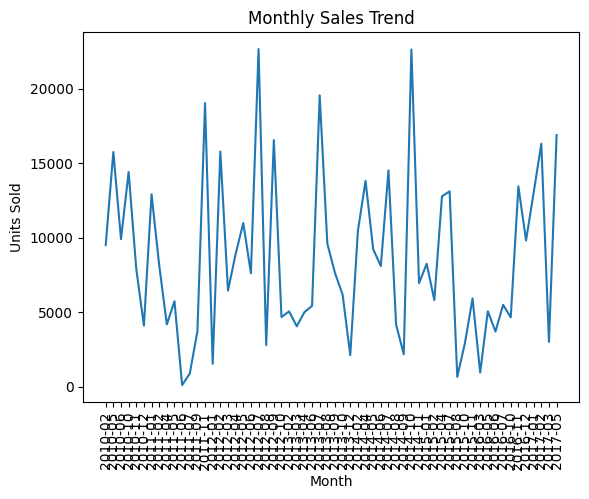

In [12]:
sns.lineplot( x = monthly_sales.index.astype(str), y = monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.show()

### Product Sold Visualization on Offline and Online

In [13]:
df.groupby('Sales Channel')['Units Sold'].sum()

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64

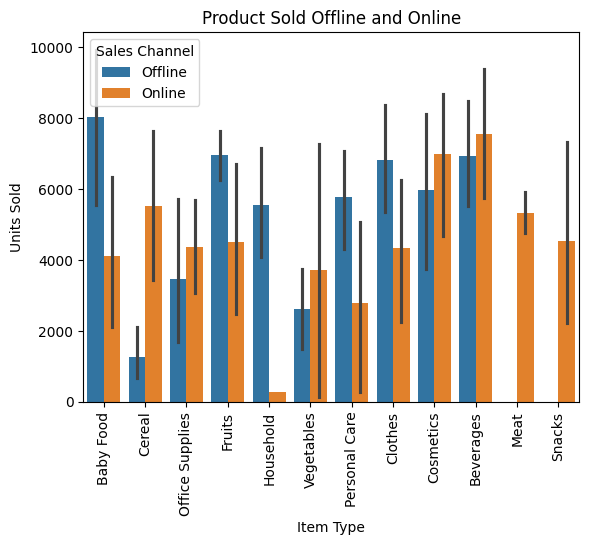

In [14]:
sns.barplot(data=df, x='Item Type', y='Units Sold', hue='Sales Channel')
plt.xticks(rotation= 90)
plt.title("Product Sold Offline and Online")
plt.show()